In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
csd = pd.read_csv('Customer_support_data.csv')

In [3]:
csd.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [4]:
csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

<Axes: xlabel='channel_name', ylabel='count'>

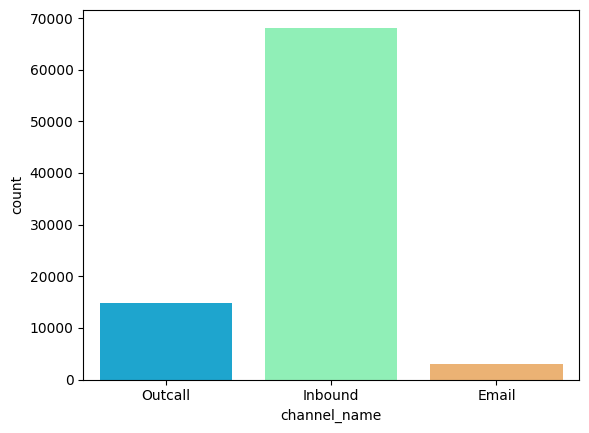

In [5]:
sns.countplot(x='channel_name', data=csd, palette='rainbow')

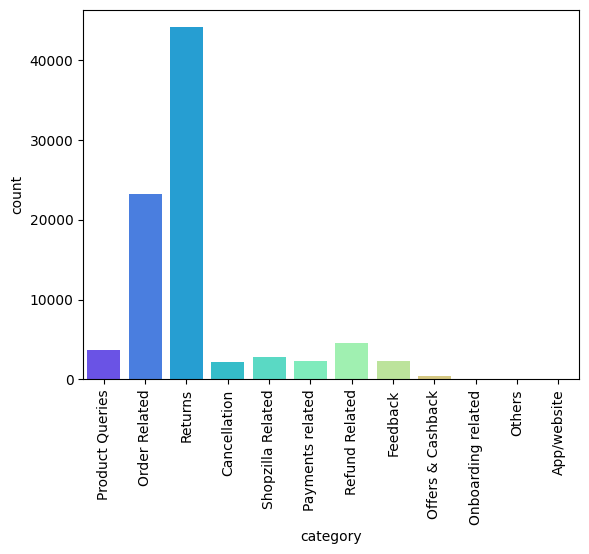

In [6]:
sns.countplot(x='category', data=csd, palette='rainbow')
plt.xticks(rotation=90)
plt.show()

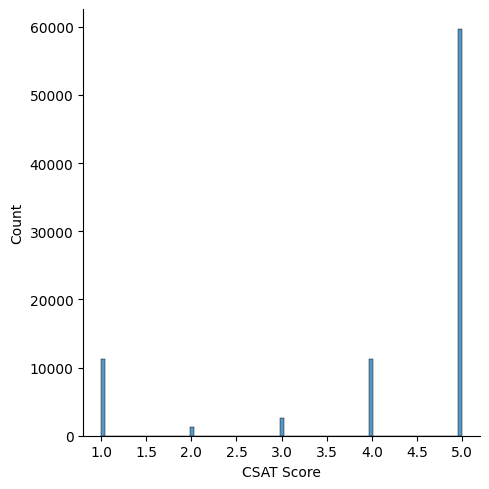

In [7]:
sns.displot(csd['CSAT Score'])

<Axes: xlabel='CSAT Score', ylabel='count'>

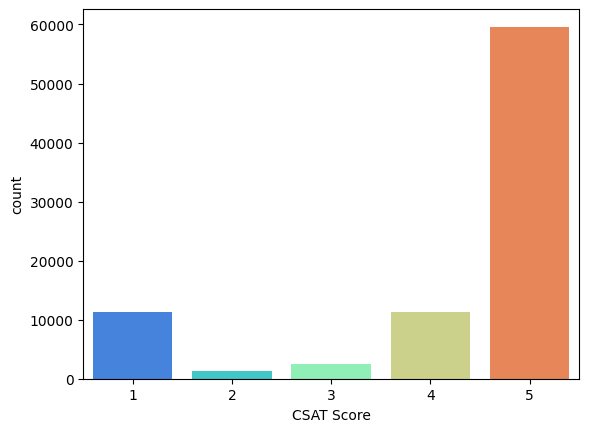

In [8]:
sns.countplot(x='CSAT Score', data=csd, palette='rainbow')

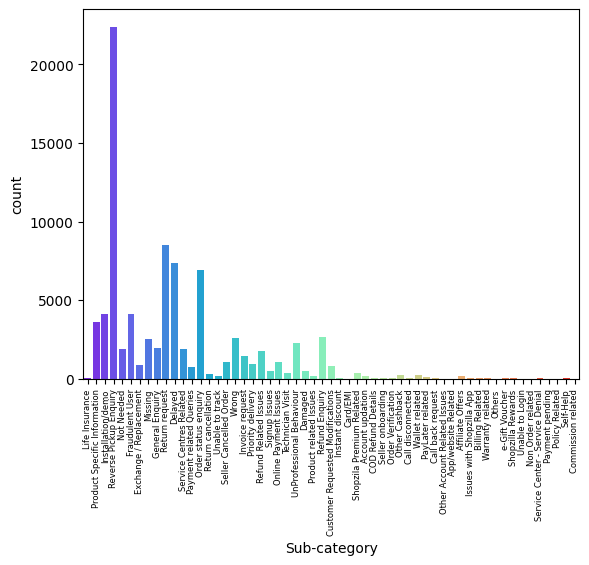

In [9]:
sns.countplot(x='Sub-category', data=csd, palette='rainbow')
plt.xticks(rotation=90, fontsize=6)
plt.show()

In [10]:
#Splitting date-time for "Issue_reported at" column and "issue_responded" column

from datetime import datetime

# Function to split the datetime string into separate columns
def split_datetime(dt_str):
    dt = datetime.strptime(dt_str, '%d/%m/%Y %H:%M')
    day = dt.day
    month = dt.month
    year = dt.year
    time = dt.strftime('%H%M')  # Format time as HHMM in 24-hour format
    return day, month, year, time

# Apply the function to the DataFrame and create new columns
csd[['report_day', 'report_month', 'report_year', 'report_time']] = csd['Issue_reported at'].apply(split_datetime).apply(pd.Series)
csd[['response_day', 'response_month', 'response_year', 'response_time']] = csd['issue_responded'].apply(split_datetime).apply(pd.Series)

In [11]:
csd.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Agent Shift,CSAT Score,report_day,report_month,report_year,report_time,response_day,response_month,response_year,response_time
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,Morning,5,1,8,2023,1113,1,8,2023,1147
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,Morning,5,1,8,2023,1252,1,8,2023,1254
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,Evening,5,1,8,2023,2016,1,8,2023,2038
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,Evening,5,1,8,2023,2056,1,8,2023,2116
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,Morning,5,1,8,2023,1030,1,8,2023,1032


In [12]:
csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

<Axes: xlabel='Agent Shift', ylabel='count'>

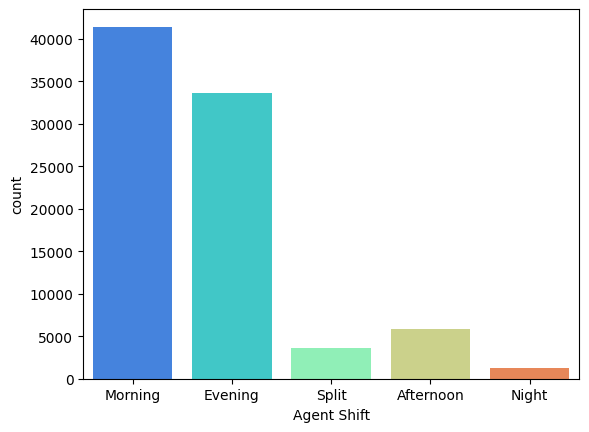

In [13]:
sns.countplot(x='Agent Shift', data=csd, palette='rainbow')

In [14]:
# Convert the new columns to int values
csd[['report_day', 'report_month', 'report_year', 'report_time',
     'response_day', 'response_month', 'response_year', 'response_time']] = csd[[
    'report_day', 'report_month', 'report_year', 'report_time',
    'response_day', 'response_month', 'response_year', 'response_time']].astype('int64')

In [15]:
csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [16]:
csd.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,Agent Shift,CSAT Score,report_day,report_month,report_year,report_time,response_day,response_month,response_year,response_time
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,Morning,5,1,8,2023,1113,1,8,2023,1147
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,Morning,5,1,8,2023,1252,1,8,2023,1254
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,Evening,5,1,8,2023,2016,1,8,2023,2038
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,Evening,5,1,8,2023,2056,1,8,2023,2116
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,Morning,5,1,8,2023,1030,1,8,2023,1032


In [17]:
csd['Day_Duration'] = csd['response_day'] - csd['report_day']
csd['Time_Duration'] = csd['response_time'] - csd['report_time']

In [18]:
csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [19]:
csd.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,...,report_day,report_month,report_year,report_time,response_day,response_month,response_year,response_time,Day_Duration,Time_Duration
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,...,1,8,2023,1113,1,8,2023,1147,0,34
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,...,1,8,2023,1252,1,8,2023,1254,0,2
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,...,1,8,2023,2016,1,8,2023,2038,0,22
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,...,1,8,2023,2056,1,8,2023,2116,0,60
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,...,1,8,2023,1030,1,8,2023,1032,0,2


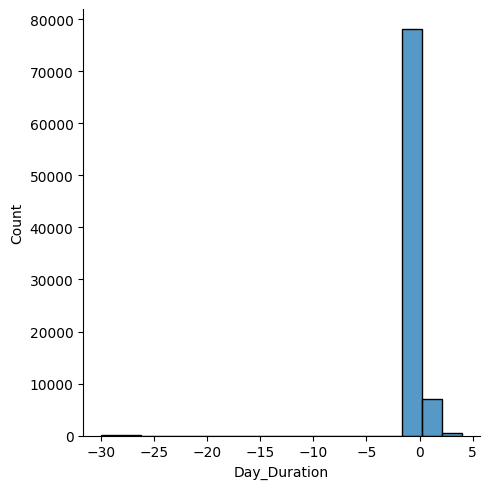

In [20]:
sns.displot(csd['Day_Duration'])

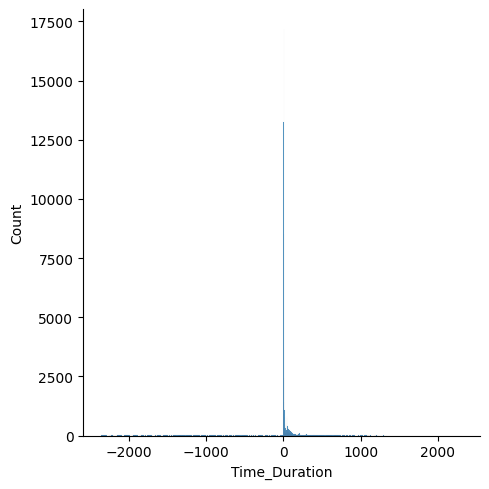

In [21]:
sns.displot(csd['Time_Duration'])

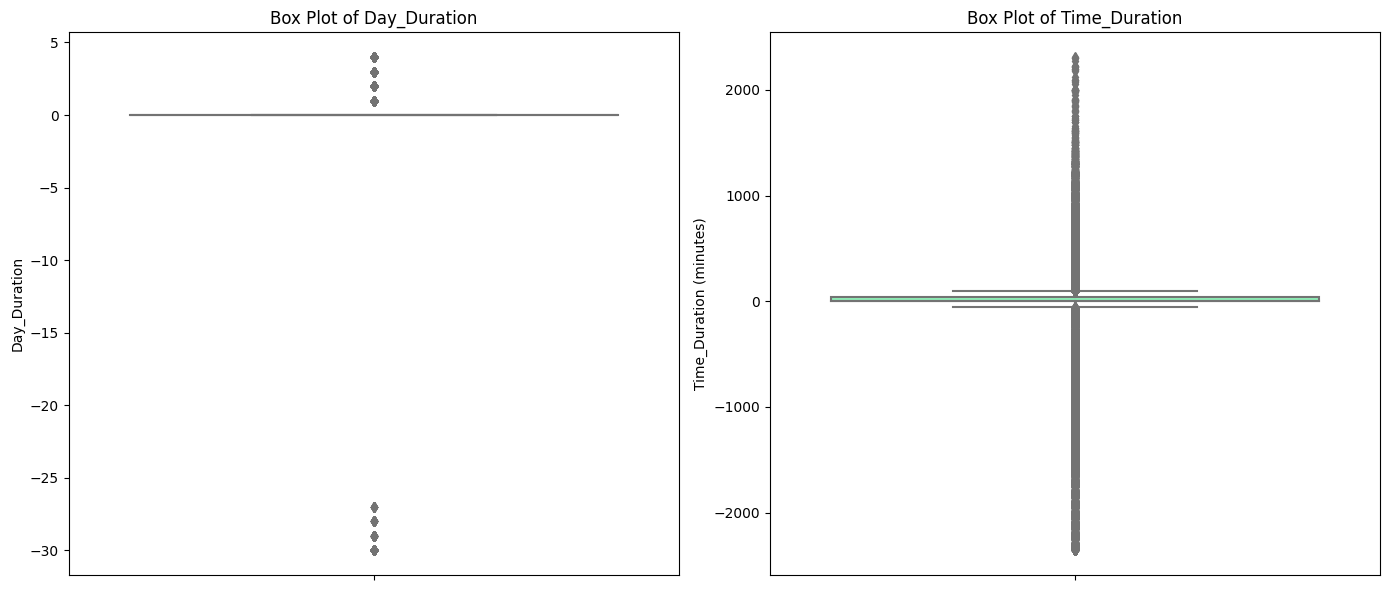

In [22]:
# Plotting the box
plt.figure(figsize=(14, 6))

# Day_Duration box plot
plt.subplot(1, 2, 1)
sns.boxplot(y='Day_Duration', data=csd, palette='rainbow')
plt.title('Box Plot of Day_Duration')
plt.ylabel('Day_Duration')

# Time_Duration box plot
plt.subplot(1, 2, 2)
sns.boxplot(y='Time_Duration', data=csd, palette='rainbow')
plt.title('Box Plot of Time_Duration')
plt.ylabel('Time_Duration (minutes)')

plt.tight_layout()
plt.show()

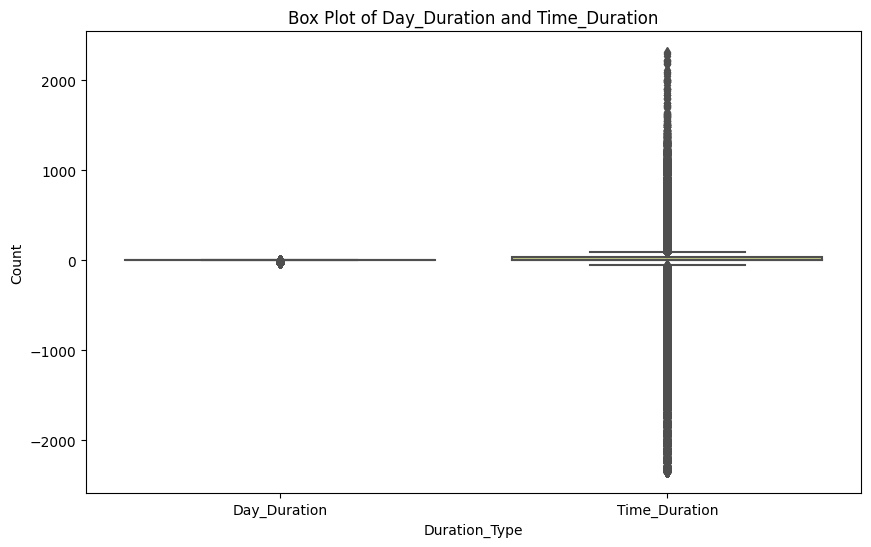

In [23]:
# Melt the DataFrame to long-form for easier plotting with seaborn
csd_long = csd.melt(value_vars=['Day_Duration', 'Time_Duration'], var_name='Duration_Type', value_name='Duration')

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Duration_Type', y='Duration', data=csd_long, palette='rainbow')
plt.ylabel('Count')
plt.title('Box Plot of Day_Duration and Time_Duration')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9192\3891367236.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(csd['Time_Duration'], kde=True, height=6, aspect=1.5, palette='rainbow')


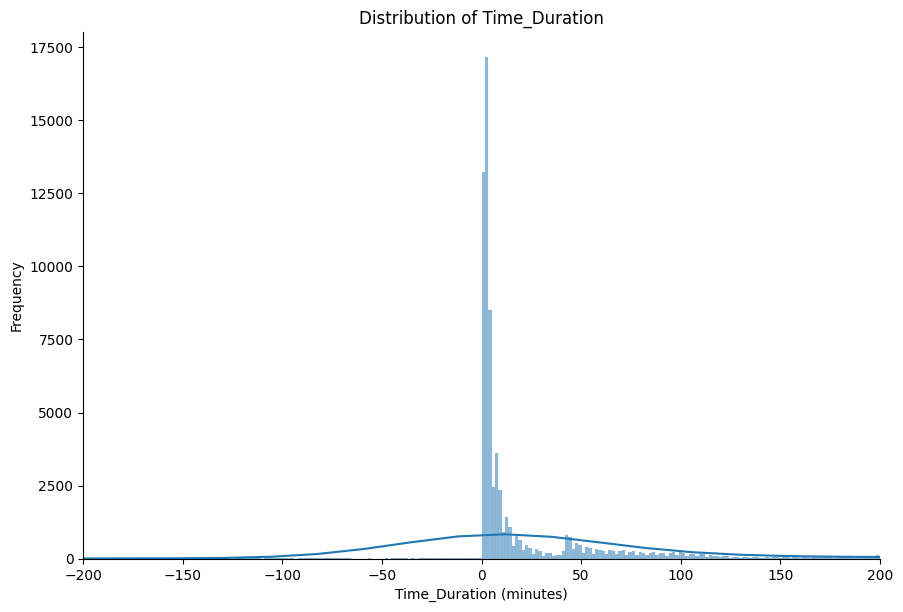

In [24]:
#Making the plots better
# Plotting the distribution plot with x-axis limits
sns.displot(csd['Time_Duration'], kde=True, height=6, aspect=1.5, palette='rainbow')
plt.xlim(-200, 200)
plt.title('Distribution of Time_Duration')
plt.xlabel('Time_Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [25]:
csd = csd.drop(['Unique id','Customer Remarks', 'Order_id', 'order_date_time', 'Customer_City', 'Product_category', 'connected_handling_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date'], axis=1)

In [26]:
csd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   channel_name    85907 non-null  object 
 1   category        85907 non-null  object 
 2   Sub-category    85907 non-null  object 
 3   Item_price      17206 non-null  float64
 4   Agent_name      85907 non-null  object 
 5   Supervisor      85907 non-null  object 
 6   Manager         85907 non-null  object 
 7   Tenure Bucket   85907 non-null  object 
 8   Agent Shift     85907 non-null  object 
 9   CSAT Score      85907 non-null  int64  
 10  report_day      85907 non-null  int64  
 11  report_month    85907 non-null  int64  
 12  report_year     85907 non-null  int64  
 13  report_time     85907 non-null  int64  
 14  response_day    85907 non-null  int64  
 15  response_month  85907 non-null  int64  
 16  response_year   85907 non-null  int64  
 17  response_time   85907 non-null 

In [27]:
# Handle missing values in remaining columns
csd = csd.fillna(0)

In [28]:
# Encode categorical features, Numerical conversion to make it usable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoders = {}
for column in ['channel_name', 'category', 'Sub-category', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift']:
    le = LabelEncoder()
    csd[column] = le.fit_transform(csd[column])
    label_encoders[column] = le

In [29]:
# Split data into features and target
#Making predictions for CSAT Score
X = csd.drop('CSAT Score', axis=1)
y = csd['CSAT Score']

# Convert all columns to float32
X = X.astype('float32')
y = y.astype('float32')

In [30]:
# Normalize numerical features
scaler = StandardScaler()
X[['Item_price', 'report_day', 'report_month', 'report_year', 'report_time', 'response_day', 'response_month', 'response_year', 'response_time', 'Day_Duration', 'Time_Duration']] = scaler.fit_transform(
    X[['Item_price', 'report_day', 'report_month', 'report_year', 'report_time', 'response_day', 'response_month', 'response_year', 'response_time', 'Day_Duration', 'Time_Duration']])


In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Build a simple neural network model
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Regression output layer
])

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [34]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/50


1719/1719 [==============================] - 14s 6ms/step - loss: 7.1657 - mae: 1.5072 - val_loss: 4.6938 - val_mae: 1.6186
Epoch 2/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.8972 - mae: 1.3170 - val_loss: 2.8927 - val_mae: 1.5577
Epoch 3/50
1719/1719 [==============================] - 11s 7ms/step - loss: 2.7523 - mae: 1.2758 - val_loss: 4.6463 - val_mae: 1.9623
Epoch 4/50
1719/1719 [==============================] - 11s 6ms/step - loss: 2.7952 - mae: 1.2748 - val_loss: 2.2432 - val_mae: 0.9515
Epoch 5/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.6313 - mae: 1.2370 - val_loss: 4.3715 - val_mae: 1.8894
Epoch 6/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.4353 - mae: 1.1954 - val_loss: 1.9608 - val_mae: 1.1475
Epoch 7/50
1719/1719 [==============================] - 10s 6ms/step - loss: 2.2796 - mae: 1.1493 - val_loss: 1.9402 - val_mae: 0.9699
Epoch 8/50
1719/1719 [==============================] - 10s 6ms/st

In [35]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

537/537 [==============================] - 3s 6ms/step - loss: 2.1055 - mae: 0.9136
Mean Absolute Error: 0.9136359095573425


In [36]:
# Making predictions
predictions = model.predict(X_test)

537/537 [==============================] - 3s 5ms/step
